In [9]:
import pandas as pd
import numpy as np
from scipy.io import arff
import urllib.request
import io

In [22]:
data=arff.loadarff("Training Dataset.arff")
df=pd.DataFrame(data[0])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [13]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [19]:
df.shape

(11055, 31)

## preprocessing


In [23]:
for i in df.columns:
  df[i]=df[i].replace(b'1',1)
  df[i]=df[i].replace(b'0',0)
  df[i]=df[i].replace(b'-1',-1)



<ipython-input-23-784139135ff3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace(b'-1',-1)
<ipython-input-23-784139135ff3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace(b'0',0)


In [25]:
df.sample(5)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
4475,1,-1,1,1,1,-1,-1,1,1,-1,...,-1,-1,1,-1,0,-1,1,1,1,1
5195,1,-1,1,-1,-1,-1,0,1,-1,1,...,1,1,-1,1,0,1,1,0,1,-1
1452,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,-1,0,-1,1,1,-1,-1
5606,-1,1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
7269,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,1,0,1,1,0,1,-1


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

## EDA

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

KeyError: 0

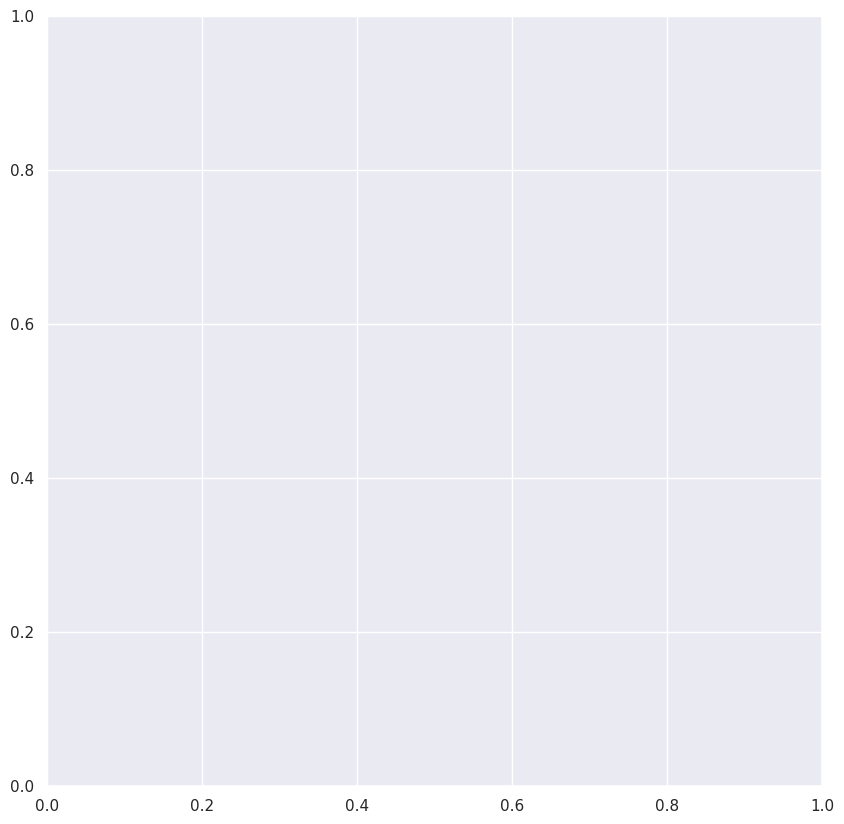

In [52]:
fig,axes=plt.subplots(figsize=(10,10))
axes.

In [58]:
df.iloc[:,-1].value_counts()

,count
Result,
1,6157
-1,4898


## Model Selection

### Logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred_lr=lr.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [160]:
def eval_metric(yt,yp):
  results={}
  results['accuracy']=accuracy_score(yt,yp)
  results['recall']=recall_score(yt,yp,average=None)
  results['precision']=precision_score(yt,yp,average=None)
  results['f1']=f1_score(yt,yp,average=None)
  results['roc_auc']=roc_auc_score(yt,yp)
  return results

In [165]:
lr_metrics_base=eval_metric(y_test,y_pred_lr)

In [166]:
lr_metrics_base=pd.DataFrame(lr_metrics_base,index=["phishing","legitimate"])
lr_metrics_base

,accuracy,recall,precision,f1,roc_auc
phishing,0.921917,0.908964,0.909601,0.909282,0.920337
legitimate,0.921917,0.931710,0.931217,0.931463,0.920337


In [81]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [97]:
def plot_cm(yt,yp):
  cm=confusion_matrix(yt,yp,normalize='true')
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Phishing","Legititmate"])
  disp.plot()

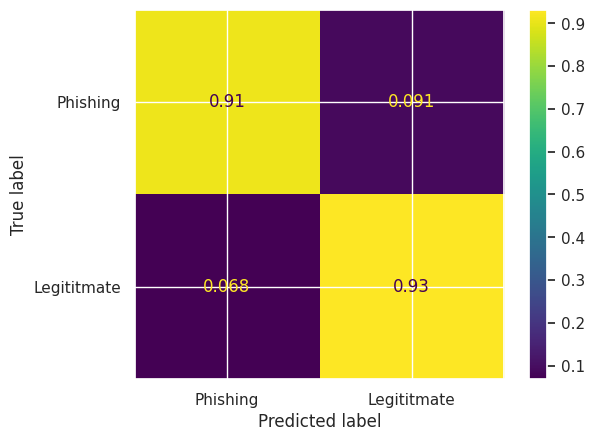

In [98]:
plot_cm(y_test,y_pred_lr)

In [88]:
## grid search cv for best parameters

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l1', 'l2'],        # L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear', 'saga'] # Solvers that support L1/L2
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [91]:
## training and evaluating best lr model

In [92]:
lr_best=LogisticRegression(C=0.1,penalty='l2',solver='saga')

In [93]:
lr_best.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='saga')

In [94]:
lr_best_pred=lr_best.predict(x_test)

In [96]:
lr_metrics_best=eval_metric(y_test,lr_best_pred)

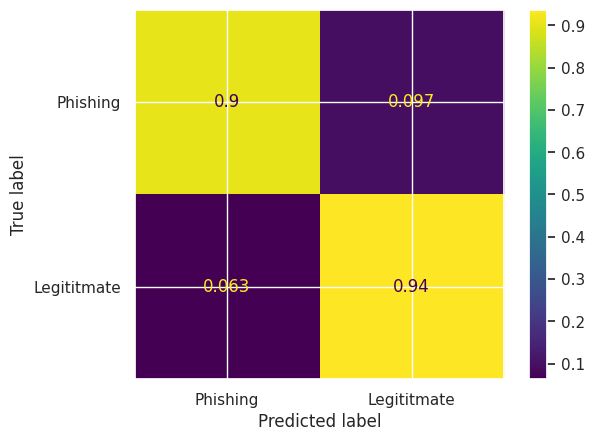

In [99]:
plot_cm(y_test,lr_best_pred)

### Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc_base=DecisionTreeClassifier()

In [102]:
dtc_base.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
dtc_base_pred=dtc_base.predict(x_test)

In [168]:
dtc_base_metric=eval_metric(y_test,dtc_base_pred)
dtc_base_metric=pd.DataFrame(dtc_base_metric,index=["phishing","legitimate"])
dtc_base_metric

,accuracy,recall,precision,f1,roc_auc
phishing,0.956286,0.945378,0.952717,0.949033,0.954955
legitimate,0.956286,0.964531,0.958947,0.961731,0.954955


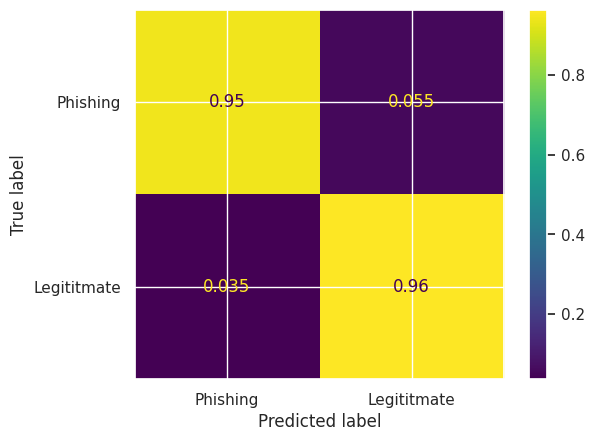

In [107]:
plot_cm(y_test,dtc_base_pred)

## Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier


In [126]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)


In [169]:
rf_metrics=eval_metric(y_test,rf_pred)
rf_metrics=pd.DataFrame(rf_metrics,index=["phishing","legitimate"])
rf_metrics

,accuracy,recall,precision,f1,roc_auc
phishing,0.968948,0.948880,0.978339,0.963384,0.966499
legitimate,0.968948,0.984119,0.962215,0.973044,0.966499


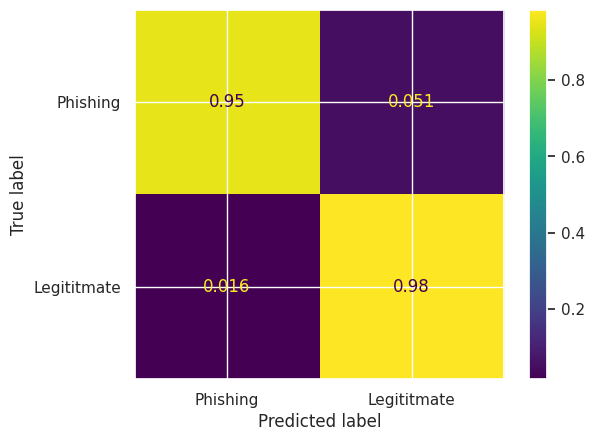

In [129]:
plot_cm(y_test,rf_pred)

## SVM


In [130]:
from sklearn.svm import SVC

In [135]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)

In [170]:
svc_metrics=eval_metric(y_test,svc_pred)
svc_metrics=pd.DataFrame(svc_metrics,index=["phishing","legitimate"])
svc_metrics

,accuracy,recall,precision,f1,roc_auc
phishing,0.942418,0.922969,0.942102,0.932437,0.940045
legitimate,0.942418,0.957120,0.942649,0.949829,0.940045


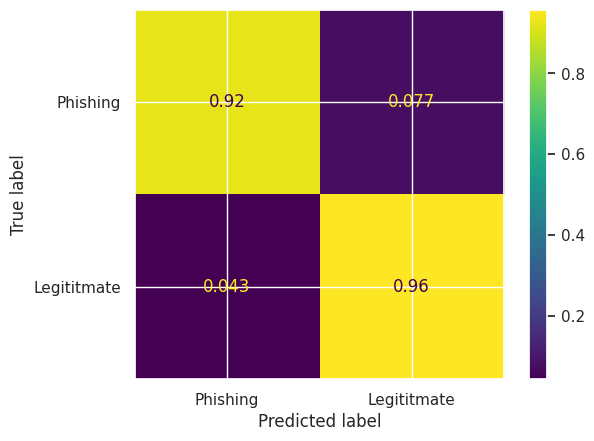

In [137]:
plot_cm(y_test,svc_pred)

## KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [171]:
knn_metrics=eval_metric(y_test,knn_pred)
knn_metrics=pd.DataFrame(knn_metrics,index=["phishing","legitimate"])
knn_metrics

,accuracy,recall,precision,f1,roc_auc
phishing,0.933675,0.915266,0.929587,0.922371,0.931429
legitimate,0.933675,0.947591,0.936682,0.942105,0.931429


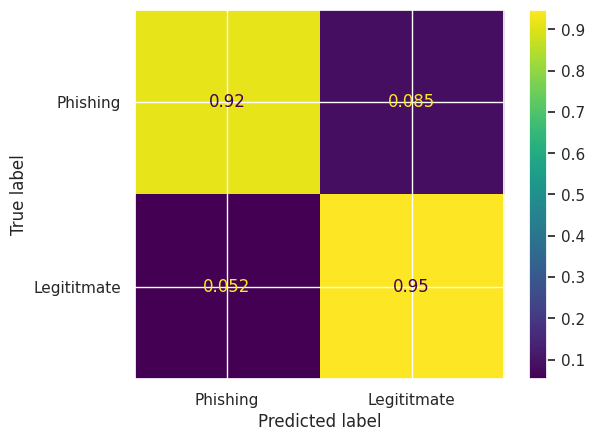

In [141]:
plot_cm(y_test,knn_pred)

In [147]:
pd.DataFrame(knn_metrics)

,accuracy,recall,precision,f1,roc_auc
0,0.933675,0.915266,0.929587,0.922371,0.931429
1,0.933675,0.947591,0.936682,0.942105,0.931429


## Best model

In [237]:
models=[lr_metrics_base,dtc_base_metric,rf_metrics,svc_metrics,knn_metrics]
models

[            accuracy    recall  precision        f1   roc_auc
 phishing    0.921917  0.908964   0.909601  0.909282  0.920337
 legitimate  0.921917  0.931710   0.931217  0.931463  0.920337,
             accuracy    recall  precision        f1   roc_auc
 phishing    0.956286  0.945378   0.952717  0.949033  0.954955
 legitimate  0.956286  0.964531   0.958947  0.961731  0.954955,
             accuracy    recall  precision        f1   roc_auc
 phishing    0.968948  0.948880   0.978339  0.963384  0.966499
 legitimate  0.968948  0.984119   0.962215  0.973044  0.966499,
             accuracy    recall  precision        f1   roc_auc
 phishing    0.942418  0.922969   0.942102  0.932437  0.940045
 legitimate  0.942418  0.957120   0.942649  0.949829  0.940045,
             accuracy    recall  precision        f1   roc_auc
 phishing    0.933675  0.915266   0.929587  0.922371  0.931429
 legitimate  0.933675  0.947591   0.936682  0.942105  0.931429]

In [256]:
names=["Logistic Reg","Decision Tree","Random Forest","SVM","KNN"]
for i,j in enumerate(models):
  print(names[i])
  print(j)
  print("\n")

Logistic Reg
            accuracy    recall  precision        f1   roc_auc
phishing    0.921917  0.908964   0.909601  0.909282  0.920337
legitimate  0.921917  0.931710   0.931217  0.931463  0.920337


Decision Tree
            accuracy    recall  precision        f1   roc_auc
phishing    0.956286  0.945378   0.952717  0.949033  0.954955
legitimate  0.956286  0.964531   0.958947  0.961731  0.954955


Random Forest
            accuracy    recall  precision        f1   roc_auc
phishing    0.968948  0.948880   0.978339  0.963384  0.966499
legitimate  0.968948  0.984119   0.962215  0.973044  0.966499


SVM
            accuracy    recall  precision        f1   roc_auc
phishing    0.942418  0.922969   0.942102  0.932437  0.940045
legitimate  0.942418  0.957120   0.942649  0.949829  0.940045


KNN
            accuracy    recall  precision        f1   roc_auc
phishing    0.933675  0.915266   0.929587  0.922371  0.931429
legitimate  0.933675  0.947591   0.936682  0.942105  0.931429




In [212]:
pd.DataFrame(model_dict)

,Logistic Reg,Decision Tree,Random Forest,SVM,KNN
0,accuracy recall precision ...,accuracy recall precision ...,accuracy recall precision ...,accuracy recall precision ...,accuracy recall precision ...


In [183]:
accuracy=[]
for i in models:
  accuracy.append(i.iloc[0,0])
accuracy

[0.9219173952366596,
 0.9562858004220681,
 0.968947844437745,
 0.9424178474525173,
 0.933675007536931]

Text(0.5, 1.0, 'Model Accuracy')

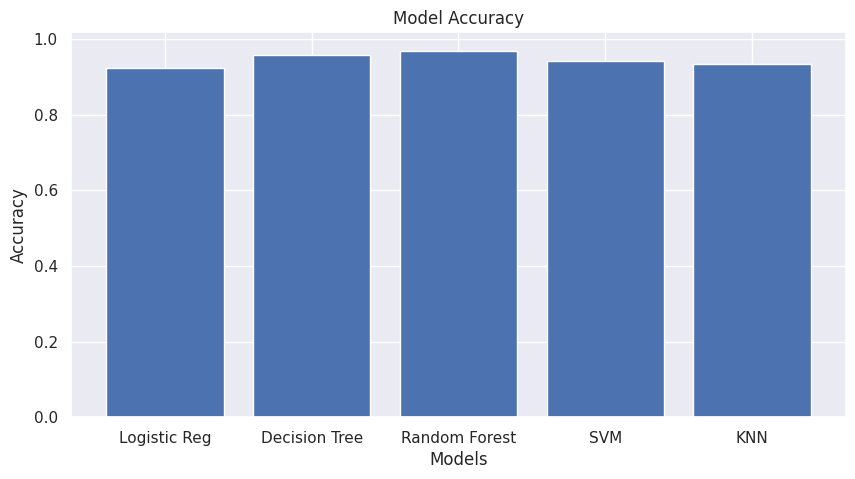

In [189]:
fig,ax=plt.subplots(figsize=(10,5))
bar=plt.bar(x=["Logistic Reg","Decision Tree","Random Forest","SVM","KNN"],height=accuracy)
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy")

In [190]:
recall=[]
for i in models:
  recall.append(i['recall'])

In [194]:
recall_df=pd.DataFrame(recall,columns=["phishing","legitimate"],index=["Logistic Reg","Decision Tree","Random Forest","SVM","KNN"])
recall_df

,phishing,legitimate
Logistic Reg,0.908964,0.931710
Decision Tree,0.945378,0.964531
Random Forest,0.948880,0.984119
SVM,0.922969,0.957120
KNN,0.915266,0.947591


Text(0.5, 1.0, 'Model Recall')

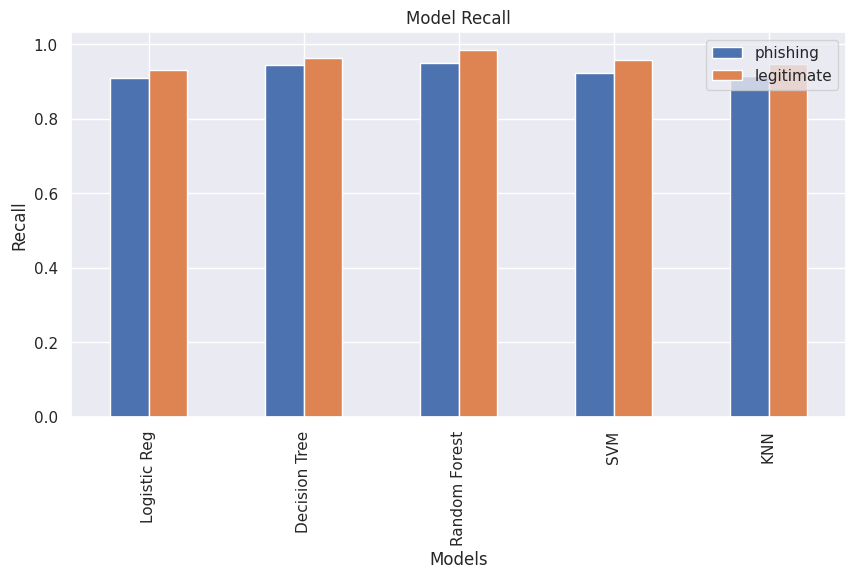

In [202]:
bar=recall_df.plot.bar(figsize=(10,5))
bar.set_xlabel("Models")
bar.set_ylabel("Recall")
bar.set_title("Model Recall")


In [204]:
precision=[]
for i in models:
  precision.append(i['precision'])

In [205]:
precision_df=pd.DataFrame(precision,columns=["phishing","legitimate"],index=["Logistic Reg","Decision Tree","Random Forest","SVM","KNN"])
precision_df

,phishing,legitimate
Logistic Reg,0.909601,0.931217
Decision Tree,0.952717,0.958947
Random Forest,0.978339,0.962215
SVM,0.942102,0.942649
KNN,0.929587,0.936682


Text(0.5, 1.0, 'Model Precision')

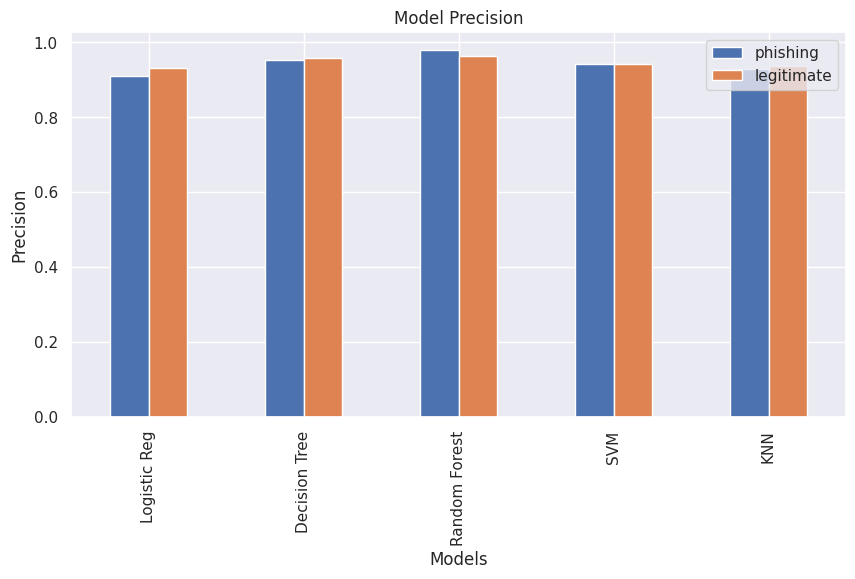

In [206]:
bar=precision_df.plot.bar(figsize=(10,5))
bar.set_xlabel("Models")
bar.set_ylabel("Precision")
bar.set_title("Model Precision")